# Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
# loading boston data from sklearn
from sklearn.datasets import load_boston 
boston = load_boston()

In [3]:
boston1 = pd.DataFrame(data = boston.data, columns=boston.feature_names)
boston1["Target"] = boston.target

In [4]:
def data_profile(dataset):
    
    """ Method name = data_profile
    Description :- Method will dataset and convert it into pandas data frame.
    checking first and last 5 rown 
    checking missing value columns and percentage 
    number of categorical and numerical columns
    number of duplicate rows
    number of column with zero standard deviation 
    size occupied in ram
    
    """
    
    missing_value = {}
    missing_value_pct = {}
    dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
    dataset["Target"] = boston.target
    lenght = len(dataset)
    print(f"shape of the dataset",dataset.shape)
    print("*"*80)
    for col in dataset.columns:
        if dataset[col].isnull().sum() > 0:
            missing_value[col] = dataset[col].isnull().sum()
            missing_value_pct[col] = (dataset[col].isnull().sum()/ lenght)*100   
    print(f'Numerical Columns\n {dataset.select_dtypes(include = "number").columns}')
    print("*"*80)
    print(f'Categorical Columns\n {dataset.select_dtypes(include = "object").columns}')
    print("*"*80)
    print(f' number of numerical Columns\n {len(dataset.select_dtypes(include = "number").columns)}')
          
    
data_profile(boston1)

shape of the dataset (506, 14)
********************************************************************************
Numerical Columns
 Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Target'],
      dtype='object')
********************************************************************************
Categorical Columns
 Index([], dtype='object')
********************************************************************************
 number of numerical Columns
 14


Boston dataset has 506 rows and 14 columns and all the column are numeric including target column, there is no categorical columns.

There is no missing value in the dataset which is a sign of good data point

In [5]:
boston1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


data looks fine as none of the columns has zero standard deviation 

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


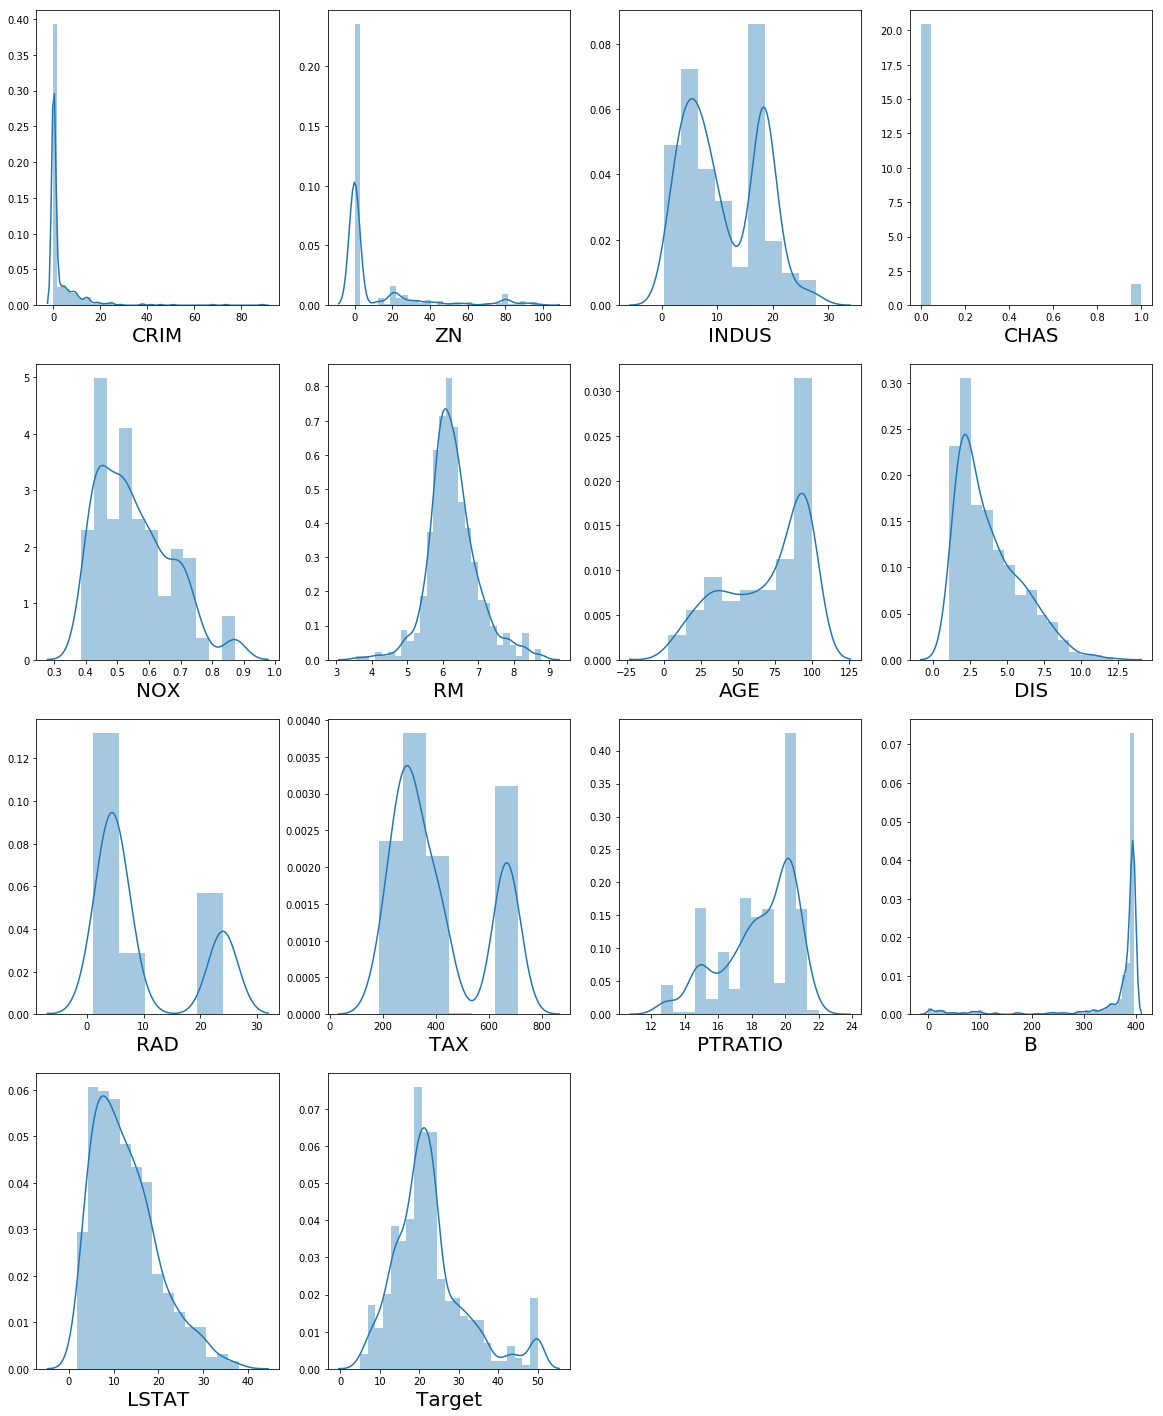

In [6]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in boston1:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(boston1[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

it has been observed that data distribution is not normal except RM columns

In [7]:
#calculating VIF for checking the correlation factor, so we create dataframe first for VIF but before that we import it
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler


#scalling the data point

X = boston1.iloc[:,:-1]

# before giving the data to VIF fucntion, it has to be scaled so we are using standard scaler
sc = StandardScaler()
scaled_one = sc.fit_transform(boston1.iloc[:,:-1])


#creting VIF dataframe

VIF = pd.DataFrame()

# calculating VIF 

VIF["vif"] = [variance_inflation_factor(scaled_one,i) for i in range(scaled_one.shape[1])]
VIF["Colums"] = X.columns
 
VIF

,vif,Colums
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


by the checking VIF report, we have found that RAD and TAX column are highly corellated considering 5% threshold thus we should remove them

In [8]:
# Remove the highly correlated features from the dataset
boston_final = boston1.drop(columns=["RAD","TAX"])

In [9]:
# data prepraration for model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train,X_test,y_train,y_test = train_test_split(boston_final.iloc[:,:-1], boston_final["Target"], test_size = 0.25, random_state = 0)


In [10]:
# Giving data to linear regression ML algorithm..
# creating LinearRegression Object
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [11]:
# prediction 
predict = LR.predict(X_test)

# importing Rsquare matrix for rsqaure calculaion

from sklearn.metrics import r2_score
rquare = r2_score(y_test,predict)
print("rquare score is " ,rquare)

# calculating Adjusted r square
n = len(boston1)
p = X.shape[1]

adjusted_Rsqaure = 1-(1-rquare)*(n-1)/(n-p-1)
print("adjusted_Rsqaure score is ",adjusted_Rsqaure)

rquare score is  0.6124470685581003
adjusted_Rsqaure score is  0.6022068488248793
